<a href="https://colab.research.google.com/github/jeffreyboschman/basic_ml_with_numpy/blob/main/classic_statistical_machine_learning_algorithms_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn import preprocessing

# Principal component analysis (dimensionality reduction)

In [ ]:
#PCA https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
# https://www.askpython.com/python/examples/principal-component-analysis

In [ ]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data" -O breast_cancer_wisconsin.csv
df = pd.read_csv('breast_cancer_wisconsin.csv', names =['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'])


--2022-06-19 00:08:53--  http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘breast_cancer_wisconsin.csv’

breast_cancer_wisco 100%[===================>] 121.19K   627KB/s    in 0.2s    

2022-06-19 00:08:54 (627 KB/s) - ‘breast_cancer_wisconsin.csv’ saved [124103/124103]



In [ ]:
features = df.iloc[:,2:-1]
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
labels = df.loc[:,'diagnosis']
labels.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
class PCA:
    def __init__(self, features, labels, normalize=True):
        self.features = np.array(features)
        self.labels = np.array(labels)
        
        #Step-1
        if normalize is True:
            self.features = (self.features - np.mean(self.features , axis = 0))/(np.std(self.features, axis=0))
            
        print(self.features.shape)
    
    def reduce_dimensions(self, num_dims):
        #Step-2
        cov_mat = np.cov(self.features, rowvar = False)
     
        #Step-3
        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
        #Step-4
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]

         #Step-5
        eigenvector_subset = sorted_eigenvectors[:,0:num_dims]
     
        #Step-6
        features_reduced = np.dot(eigenvector_subset.transpose() , self.features.transpose() ).transpose()
     
        return features_reduced
    
    def print_covariance_matrix(self, names=None):
        if names is not None:
            df = pd.DataFrame(self.features, columns = names)
        else:
            names = [f'Feature {num}' for num in range(self.features.shape[1])]
            df = pd.DataFrame(self.features, columns = names)

        plt.figure(figsize=(20, 10))
        heatmap = sns.heatmap(df.corr(),cmap='BrBG',annot=True)

    def plot_2_dimensions(self):
        features_reduced_2 = self.reduce_dimensions(2)

        fig, ax = plt.subplots()

        x = features_reduced_2[:,0]
        y = features_reduced_2[:,1]

        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")

        ax.scatter(x, y, c=self.labels, cmap='Set1')

        plt.show()


(569, 30)
(569, 2)


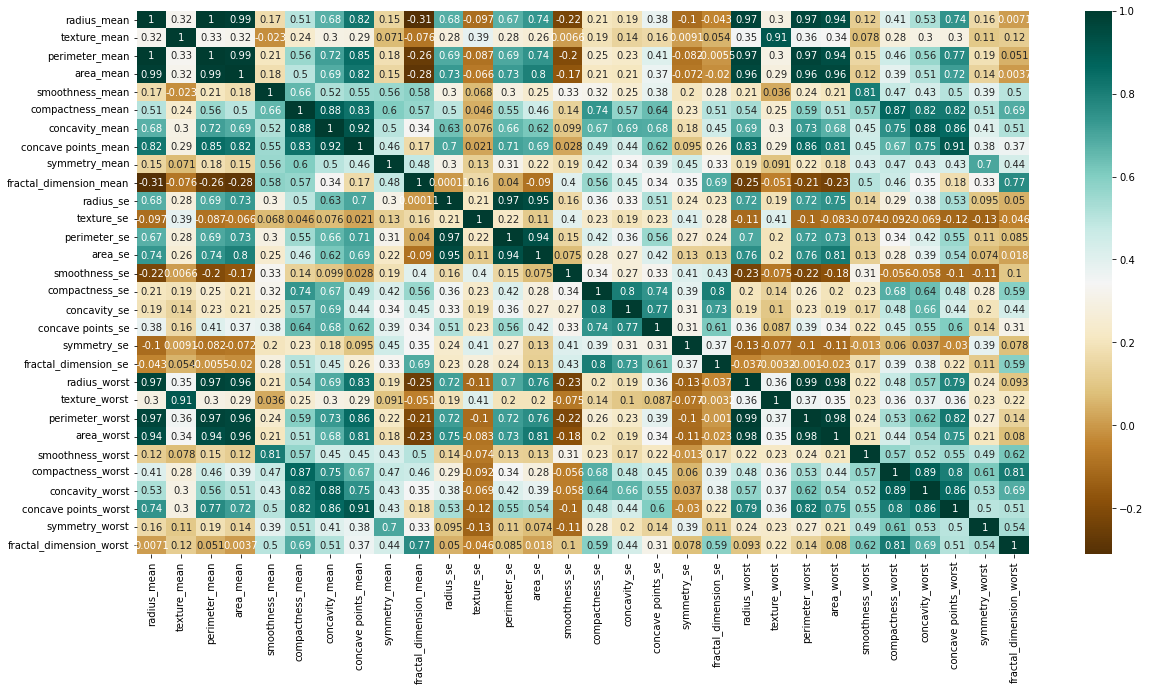

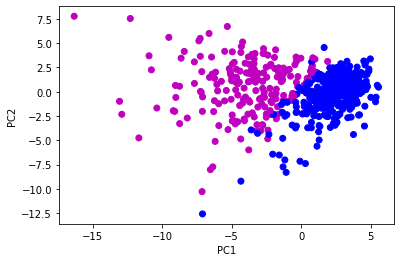

In [ ]:
pca = PCA(features, labels)
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
pca.print_covariance_matrix(names=feature_names)

features_2dims = pca.reduce_dimensions(2)
print(features_2dims.shape)
pca.plot_2_dimensions()

# Create ref/test splits from lower-dimensional data

In [ ]:
SPLIT_PERCENT = 0.7

num_examples = features_2dims.shape[0]
shuffled_indices = np.random.permutation(num_examples)
max_train_idx = int(SPLIT_PERCENT*num_examples)
train_indices, test_indices = shuffled_indices[:max_train_idx], shuffled_indices[max_train_idx:]

ref_features, test_features, ref_labels, test_labels = features_2dims[train_indices], features_2dims[test_indices], labels[train_indices], labels[test_indices]
print(ref_features.shape, test_features.shape, ref_labels.shape, test_labels.shape)

(398, 2) (171, 2) (398,) (171,)


# k-nearest neighbours (classification)

In [ ]:
#https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features

cmap_light = ListedColormap(['bisque', 'lightcyan', 'palegreen'])
cmap_bold = ListedColormap(['darkorange', 'cyan', 'limegreen'])

class knn():
    def __init__(self, ref_features, ref_labels):
        '''Initializes the k-nn classifier based on a ref_features matrix and the corresponding class labels for each point in ref_features.
        
        ref_features is an array with size (n,d), where n is the number of points (rows) and d is the number of features that each point has
        ref_labels is an array of integers with size (n), so there is an integer representing a class label for each point (row) of ref_features
        '''
        
        self.ref_features = np.array(ref_features)
        self.ref_labels = np.array(ref_labels)
        assert ref_features.shape[0] == ref_labels.shape[0], f"The size of the first dimension of ref_features {ref_features.shape[0]} does \
            not equal the size of the first dimension of ref_labels {ref_labels.shape[0]}"

        self.ref_df = pd.DataFrame(self.ref_labels, columns=['orig_labels'])
        self.ref_df['ax1'] = self.ref_features[:,0]
        self.ref_df['ax2'] = self.ref_features[:,1]

        self.le = preprocessing.LabelEncoder() #label encoder to make sure labels are int
        self.le.fit(self.ref_df.orig_labels)
        self.ref_df['int_labels'] = self.le.transform(self.ref_df.orig_labels)


    def get_predictions(self, k, test_features):
        '''Calculates the predicted classes of the points (rows) of test_features according to the k nearest points (rows) in ref_features.
        
        k is a user-defined constant that determines how many points in the ref_features matrix will determine the class of a point in 
            test_features (the class of the majority of the k nearest ref_features points will determine the class of the test_features point)
        test_features is an array of points that we want to classify with size (m,d) (i.e. same number of features d as ref_features)
        '''
        test_features = np.array(test_features)
        assert test_features.shape[1] == self.ref_features.shape[1], f"The number of features of test_features {test_features.shape[1]} does \
            not equal the number of dimensions of ref_features {self.ref_features.shape[1]}"  
        
        k = int(k)
        _ref_features = np.expand_dims(self.ref_features, axis=1) #shape (n, 1, d)
        _test_features = np.expand_dims(test_features, axis=0) #shape (1, m, d)
        distances = np.linalg.norm(_ref_features - _test_features, axis=2, ord=2) #shape (n,m)
        top_k_indices = distances.argsort(axis = 0)[:k] #shape (k,m)
        top_k_labels = np.take(np.array(self.ref_df['int_labels']), top_k_indices).astype(int) #shape (k,m)
        pred_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), 0, top_k_labels) #shape (m,)

        return pred_labels
    
    def calculate_background(self, k, dx):
        x_min, x_max = self.ref_df['ax1'].min() - 0.1, self.ref_df['ax1'].max() + 0.1
        y_min, y_max = self.ref_df['ax2'].min() - 0.1, self.ref_df['ax2'].max() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                             np.arange(y_min, y_max, dx))
        background_preds = self.get_predictions(k, np.c_[xx.ravel(), yy.ravel()])
        background_preds = background_preds.reshape(xx.shape)

        return xx, yy, background_preds

    def plot_2d_knn(self, k, test_features = None, test_labels = None, dx = 0.1,):
        '''Visualizes the ref_features points (as circles) on a 2d graph and plots the k-nn decision boundary based on the ref_features and k 
        (Note: only works if ref_features has only 2 features). 
        If given, also plots the points of test_features (as stars).'''

        assert self.ref_features.shape[1] == 2, f"This visualizer can only plot a 2d graph, but your ref_features matrix has {self.ref_features.shape[1]} features"
        
        k = int(k)
        xx, yy, background_preds = self.calculate_background(k, dx)

        fig, ax = plt.subplots()

        background_plot = ax.pcolormesh(xx, yy, background_preds, cmap=cmap_light)
        ref_points_plot = ax.scatter(self.ref_df['ax1'], self.ref_df['ax2'], c=self.ref_df["int_labels"], cmap=cmap_bold, s=20)

        if test_features is not None and test_labels is not None:
            test_features = np.array(test_features)
            test_labels = np.array(test_labels)
            test_df = pd.DataFrame(test_labels, columns=['orig_labels'])
            test_df['int_labels'] = self.le.transform(test_df.orig_labels)
            test_preds = self.get_predictions(k, test_features)
            test_points_plot = ax.scatter(test_features[:, 0], test_features[:, 1], c=test_df['int_labels'], cmap=cmap_bold, marker = '*',  s=70)
            
            test_legend = ax.legend(*test_points_plot.legend_elements(),
                     loc="lower right", title="Test points")
            ax.add_artist(test_legend)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ref_legend = ax.legend(*ref_points_plot.legend_elements(),
                     loc="lower left", title="Ref points")
        
        plt.show


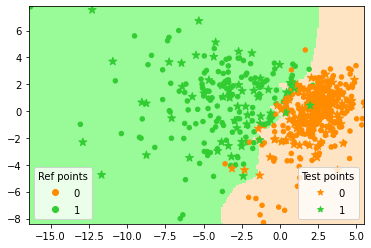

In [ ]:
knn2 = knn(ref_features, ref_labels)
knn2.plot_2d_knn(k=3, test_features = test_features, test_labels = test_labels)

# Support Vector Machine